<a href="https://colab.research.google.com/github/JoeArias1982/Machine-Learning-HW2-UT-Austin-/blob/main/HW2p_fve1o0p79i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [57]:
def generate_data(m):
    # returns the true w as well as X, Y data
    w = np.random.randn(10) #Random vector from N(0, I)
    w = w / np.linalg.norm(w) #Normalize the lenght of w

    X = np.random.randn(m, 10) #Random vector from N(0, I)
    z = np.dot(X, w) #Dot product for all products
    p_y_eq_1 = 1 / (1 + np.exp(-z)) #Sigmoid function
    Y = np.random.rand(m) < p_y_eq_1 #Determine yi based on P[y=+1]

    return w, X, Y.astype(int)


    ...

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [58]:
from re import X
from sklearn.linear_model import LogisticRegression

def learn_weights_logistic_regression(X,y):
  #Create and fit the logistic regression model
  model = LogisticRegression(max_iter=1000)
  model.fit(X,y)

  w_learned = model.coef_[0] #Coefficient of the features
  intercept = model.intercept_[0] #Intercept term

  return w_learned, intercept

#Example Usage
m = 100 #Size of the training set
true_w, X, Y = generate_data(m)
w_learned, intercept = learn_weights_logistic_regression(X,Y)

print("True Weights:", true_w)
print("Learned Weights:", w_learned)
print("Intercept:", intercept)

True Weights: [-0.38241277 -0.04009323 -0.03642209 -0.09661738  0.01230829  0.15958235
 -0.53678234  0.08759006  0.1799299   0.69834908]
Learned Weights: [-7.71353203e-01  4.13029146e-01  9.24737474e-05  3.67471285e-01
 -5.54723731e-02  1.08390508e-01 -4.84815371e-01  3.80404339e-01
  2.21698431e-01  1.15830068e+00]
Intercept: 0.06055448512655726


## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [59]:
def sigmoid(z):

  return 1 / (1 + np.exp(-z))

def compute_gradient(X, Y, w):
  m = len(Y)
  gradient = np.zeros((w.shape[0],)) #Correct initialization
  for i in range(m):
    xi = X[i]
    yi = Y[i]
    sigma_wxi = sigmoid(w.dot(xi))
    gradient += (sigma_wxi - yi) * sigma_wxi * (1 - sigma_wxi) * xi

  return gradient / m

def gradient_descent_square_loss(X, Y, eta=0.01, max_iter=1000):
  #Initialize the weights
  w = np.zeros(X.shape[1])

  #Run gradient descent
  for t in range(max_iter):
    #Calculate the gradient
    gradient = compute_gradient(X, Y, w)

    #Update the weights
    w = w - eta * gradient

  return w


true_w, X, Y = generate_data(m)
w_learned = gradient_descent_square_loss(X,Y)

print("True Weights:", true_w)
print("Learned Weights:", w_learned)


True Weights: [-0.120355   -0.07430969 -0.40899663 -0.35937315  0.40655043 -0.58797156
 -0.05831472 -0.1489248   0.23974165  0.29919286]
Learned Weights: [ 0.01480639 -0.02406549 -0.0699655  -0.11241644  0.06429068 -0.1014454
  0.07723954 -0.07228264  0.00221064  0.16154099]


## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [60]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_stochastic_gradient(x_i, y_i, w):
    sigma_wxi = sigmoid(np.dot(w, x_i))
    gradient = (sigma_wxi - y_i) * sigma_wxi * (1 - sigma_wxi) * x_i
    return gradient

def stochastic_gradient_descent_square_loss(X, Y, eta=0.01, max_iter=1000):
    w = np.zeros(X.shape[1])  # Initialize the weights
    m = len(Y)

    for t in range(max_iter):
        i = np.random.randint(0, m)  # Select a random training example
        x_i = X[i]
        y_i = Y[i]

        gradient = compute_stochastic_gradient(x_i, y_i, w)
        w = w - eta * gradient  # Update the weights

    return w

# Assuming the data is already generated
true_w, X, Y = generate_data(m)  # Use the generate_data function from before
w_learned_sgd = stochastic_gradient_descent_square_loss(X, Y)

print("True Weights:", true_w)
print("Learned Weights (SGD):", w_learned_sgd)



True Weights: [ 0.53360679  0.1363831  -0.47289919 -0.14971077 -0.10249376  0.40739276
 -0.20873599  0.33630032  0.33913251 -0.04963034]
Learned Weights (SGD): [ 0.18091363 -0.05093872  0.03069843 -0.16915    -0.06179078 -0.05313632
 -0.17049521  0.17199589 -0.09859939  0.02206551]


## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w -
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

In [61]:
from time import time
import numpy as np

# Assuming generate_data, learn_weights_logistic_regression, gradient_descent_square_loss, and stochastic_gradient_descent_square_loss are defined

# Define a dictionary to hold the algorithms
algorithms = {
    "Logistic Regression": learn_weights_logistic_regression,
    "Gradient Descent": gradient_descent_square_loss,
    "SGD": stochastic_gradient_descent_square_loss
}

ms = [50, 100, 150, 200, 250]  # Different sample sizes

# Initialize a dictionary to store results
results = {algo: {"errors": [], "times": []} for algo in algorithms}

for m in ms:
    for algo_name, algo_func in algorithms.items():
        start_time = time()
        error_sum = 0
        for _ in range(10):  # Averaging over different w's
            true_w, X, Y = generate_data(m)
            if algo_name == "Logistic Regression":
                w_learned, _ = algo_func(X, Y)  # Adjusting for LR returning w and intercept
            else:
                w_learned = algo_func(X, Y)  # GD and SGD return only w
            error_sum += np.linalg.norm(true_w - w_learned)
        avg_error = error_sum / 10
        results[algo_name]["errors"].append(avg_error)
        results[algo_name]["times"].append(time() - start_time)

# Displaying the results
for algo_name in algorithms:
    print(f"{algo_name}:")
    for m, error, time_taken in zip(ms, results[algo_name]["errors"], results[algo_name]["times"]):
        print(f"  m={m}, Average Error: {error:.3f}, Time: {time_taken:.2f} seconds")


Logistic Regression:
  m=50, Average Error: 0.954, Time: 0.04 seconds
  m=100, Average Error: 0.829, Time: 0.03 seconds
  m=150, Average Error: 0.620, Time: 0.02 seconds
  m=200, Average Error: 0.502, Time: 0.03 seconds
  m=250, Average Error: 0.475, Time: 0.03 seconds
Gradient Descent:
  m=50, Average Error: 0.748, Time: 2.79 seconds
  m=100, Average Error: 0.707, Time: 6.60 seconds
  m=150, Average Error: 0.690, Time: 8.21 seconds
  m=200, Average Error: 0.643, Time: 10.79 seconds
  m=250, Average Error: 0.667, Time: 13.86 seconds
SGD:
  m=50, Average Error: 0.722, Time: 0.11 seconds
  m=100, Average Error: 0.710, Time: 0.12 seconds
  m=150, Average Error: 0.693, Time: 0.20 seconds
  m=200, Average Error: 0.660, Time: 0.24 seconds
  m=250, Average Error: 0.623, Time: 0.20 seconds


# Problem 2

In [62]:
from sklearn import datasets

In [63]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

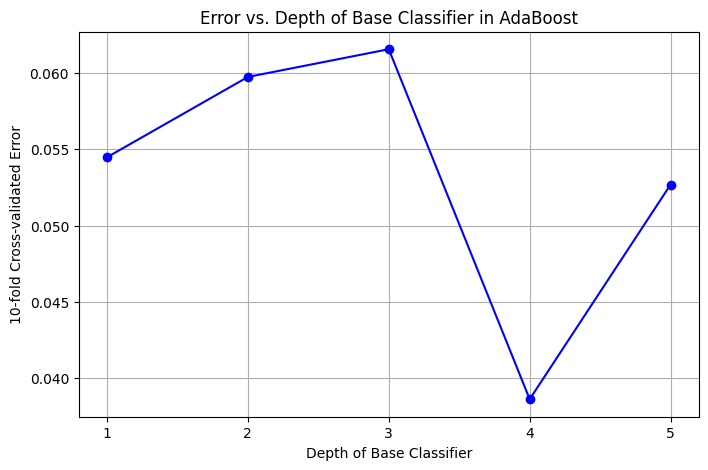

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Range of depths to test
depths = range(1, 6)
cv_errors = []

for depth in depths:
    # Instantiate the base learner: a decision tree of specified depth
    base_learner = DecisionTreeClassifier(max_depth=depth, random_state=101)

    # Instantiate the AdaBoost classifier with the base learner
    ada_boost = AdaBoostClassifier(base_estimator=base_learner,
                                   n_estimators=10,
                                   learning_rate=1,
                                   random_state=101)

    # Perform 10-fold cross-validation and record the average error
    scores = cross_val_score(ada_boost, X, y, cv=10, scoring='accuracy')
    cv_errors.append(1 - np.mean(scores))

# Plotting the curve of 1 - accuracy (error) against base classifier depth
plt.figure(figsize=(8, 5))
plt.plot(depths, cv_errors, marker='o', linestyle='-', color='blue')
plt.xlabel('Depth of Base Classifier')
plt.ylabel('10-fold Cross-validated Error')
plt.title('Error vs. Depth of Base Classifier in AdaBoost')
plt.xticks(depths)
plt.grid(True)
plt.show()
